In [1]:
from kmeans import Kmeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Exercise 1 - Bianchi Dataset

In [2]:
data = pd.read_csv("./data/bianchi.csv")

kmeans = Kmeans()
kmeans.fit(k=3,
           data=data,
           centroid_centers=np.array([[1., 1.], [3., 3.], [5., 5.]])
           )

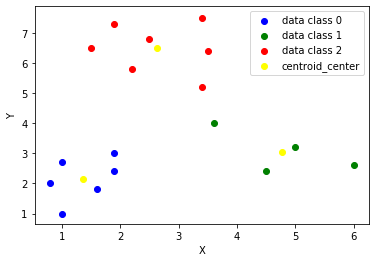

In [3]:
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 0)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 0)[0]].values,
            c='blue',
            label='data class 0')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 1)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 1)[0]].values,
            c='green',
            label='data class 1')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 2)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 2)[0]].values,
            c='red',
            label='data class 2')
plt.scatter(kmeans.centroid_centers[:, 0], kmeans.centroid_centers[:, 1], c='yellow', label='centroid_center')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Exercise 2.1 - Iris Dataset

In [4]:
data = pd.read_csv("./data/iris.csv")
# Two Principal Component
pca = PCA(n_components=2)
pc2 = pca.fit_transform(data.values)
data = pd.DataFrame.from_dict({
                                'x': np.hstack(pc2[:, 0]),
                                'y': np.hstack(pc2[:, 1])
                                })

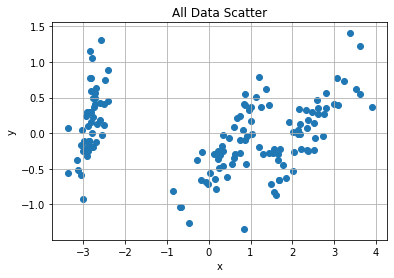

In [5]:
X = data['x'].values
y = data['y'].values
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('All Data Scatter')
plt.grid()

In [6]:
kmeans = Kmeans()
kmeans.fit(k=3,
           data=data,
           centroid_centers=np.array([[-3., 0.], [0., 0.], [3., 0.]]),
           n=100
           )

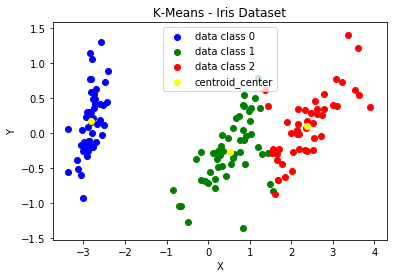

In [7]:
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 0)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 0)[0]].values,
            c='blue',
            label='data class 0')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 1)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 1)[0]].values,
            c='green',
            label='data class 1')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 2)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 2)[0]].values,
            c='red',
            label='data class 2')
plt.scatter(kmeans.centroid_centers[:, 0], kmeans.centroid_centers[:, 1], c='yellow', label='centroid_center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means - Iris Dataset')
plt.legend()
plt.show()

# Exercise 2.2 - Haberman's Survival Data Set

In [8]:
data = pd.read_csv("./data/haberman.csv", header=None)
data.columns = ['col_0', 'col_1', 'col_2', 'col_3']
data_drop = data.drop(columns=['col_3'])
target = data['col_3'].values

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(data_drop.values, target)
lda_array = lda.transform(data_drop.values)
data = pd.DataFrame.from_dict({
                                'x': np.hstack(lda_array),
                                'y': target
                              })

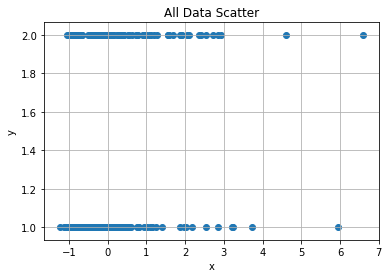

In [10]:
X = data['x'].values
y = data['y'].values
plt.scatter(X, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('All Data Scatter')
plt.grid()

In [11]:
kmeans = Kmeans()
kmeans.fit(k=2,
           data=data,
           centroid_centers=np.array([[0., 1.], [0., 2.]]),
           n=100
           )

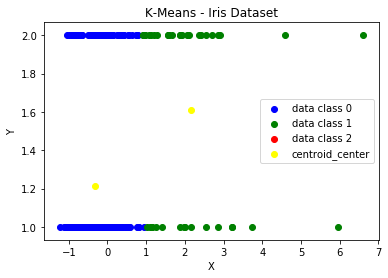

In [12]:
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 0)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 0)[0]].values,
            c='blue',
            label='data class 0')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 1)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 1)[0]].values,
            c='green',
            label='data class 1')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 2)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 2)[0]].values,
            c='red',
            label='data class 2')
plt.scatter(kmeans.centroid_centers[:, 0], kmeans.centroid_centers[:, 1], c='yellow', label='centroid_center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means - Iris Dataset')
plt.legend()
plt.show()

# Exercise 2.3 - Wine Quality Data Set

In [13]:
data = pd.read_csv("./data/winequality-red.csv")
data['quality'].loc[data['quality'] < 6] = 0
data['quality'].loc[data['quality'] >= 6] = 1
data_target = data['quality']
data_drop = data.drop(columns=['quality'])
# Two Principal Component
pca = PCA(n_components=2)
pc2 = pca.fit_transform(data.values)
data = pd.DataFrame.from_dict({
                                'x': np.hstack(pc2[:, 0]),
                                'y': np.hstack(pc2[:, 1])
                              })

C:\Users\Capati\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


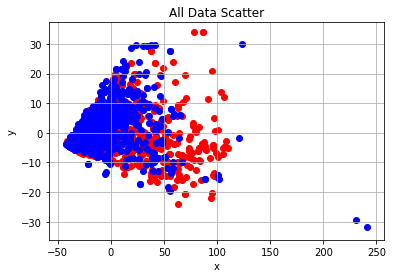

In [14]:
class_one = data_target.loc[data_target == 1].index
class_zero = data_target.loc[data_target == 0].index
X1 = data['x'].iloc[class_one].values
y1 = data['y'].iloc[class_one].values
X0 = data['x'].iloc[class_zero].values
y0 = data['y'].iloc[class_zero].values
plt.scatter(X0, y0, c='red')
plt.scatter(X1, y1, c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('All Data Scatter')
plt.grid()

In [15]:
kmeans = Kmeans()
kmeans.fit(k=2,
           data=data,
           centroid_centers=np.array([[0., 0.], [100., 0.]]),
           n=100
           )

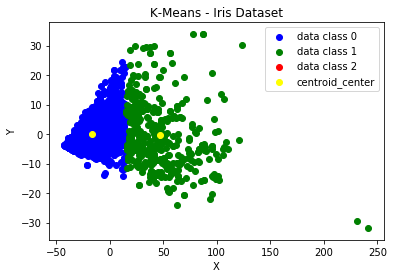

In [16]:
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 0)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 0)[0]].values,
            c='blue',
            label='data class 0')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 1)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 1)[0]].values,
            c='green',
            label='data class 1')
plt.scatter(data['x'].iloc[np.where(kmeans.classes == 2)[0]].values,
            data['y'].iloc[np.where(kmeans.classes == 2)[0]].values,
            c='red',
            label='data class 2')
plt.scatter(kmeans.centroid_centers[:, 0], kmeans.centroid_centers[:, 1], c='yellow', label='centroid_center')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means - Iris Dataset')
plt.legend()
plt.show()